In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-7,secondary,0,1,2022.0,1.0,Apartment,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Apartment,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Apartment,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-7,secondary,0,1,1997.0,1.0,Apartment,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Apartment,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [23]:
data.describe()

,area,number_of_rooms,parking,elevator,year_of_creation,internet,basement,price_for_m2_in_PLN,balcony,garden,terrace,latitude,longtitude
count,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,59.539128,2.690221,0.607823,0.546514,2003.076616,0.440476,0.361565,14591.856128,0.597534,0.125085,0.089371,54.390215,18.567978
std,23.995547,0.895533,0.488257,0.497853,30.973095,0.496465,0.480474,6458.732290,0.490416,0.330829,0.285290,0.343649,1.829429
min,1.000000,1.000000,0.000000,0.000000,1836.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.828866,-86.789292
25%,43.900000,2.000000,0.000000,0.000000,1989.000000,0.000000,0.000000,10754.030000,0.000000,0.000000,0.000000,54.348542,18.467438
50%,55.500000,3.000000,1.000000,1.000000,2019.000000,0.000000,0.000000,13209.020000,1.000000,0.000000,0.000000,54.420659,18.559893
75%,70.250000,3.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,17680.545000,1.000000,0.000000,0.000000,54.471546,18.609269
max,200.110000,5.000000,1.000000,1.000000,2026.000000,1.000000,1.000000,57988.170000,1.000000,1.000000,1.000000,62.097038,126.699790


In [24]:
data = data.drop('title', axis=1)

<Axes: >

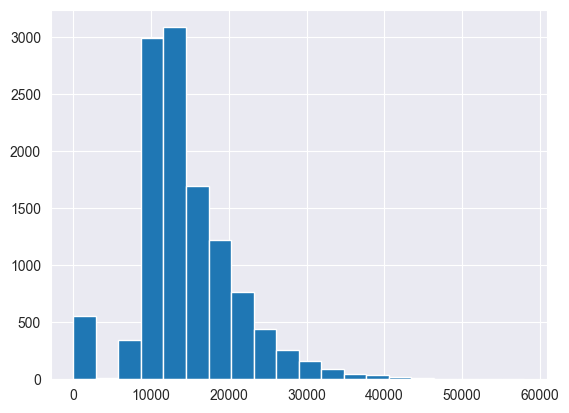

In [25]:
data['price_for_m2_in_PLN'].hist(bins=20)

In [26]:
threshold_low = 5000  # Set your threshold value here
threshold_high = 30000
data = data[data['price_for_m2_in_PLN'] >= threshold_low]
data = data[data['price_for_m2_in_PLN'] <= threshold_high]
data.count()

area                   10916
number_of_rooms        10916
floor                  10916
type_of_market         10916
parking                10916
elevator               10916
year_of_creation       10916
internet               10916
type_of_building       10916
basement               10916
price_for_m2_in_PLN    10916
balcony                10916
garden                 10916
terrace                10916
street                  9947
district               10916
city                   10916
latitude               10916
longtitude             10916
dtype: int64

In [27]:
data[data['price_for_m2_in_PLN'] > 30000].count()

area                   0
number_of_rooms        0
floor                  0
type_of_market         0
parking                0
elevator               0
year_of_creation       0
internet               0
type_of_building       0
basement               0
price_for_m2_in_PLN    0
balcony                0
garden                 0
terrace                0
street                 0
district               0
city                   0
latitude               0
longtitude             0
dtype: int64

In [28]:
data

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,24.89,1.0,4-7,secondary,0,1,2022.0,1.0,Apartment,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,25.72,1.0,0,secondary,0,1,2022.0,1.0,Apartment,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Apartment,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,101.58,4.0,4-7,secondary,0,1,1997.0,1.0,Apartment,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Apartment,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,56.33,3.0,1-3,primary,1,0,2024.0,1.0,Apartment,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
11756,61.44,3.0,1-3,primary,1,0,2024.0,1.0,Apartment,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
11757,47.00,2.0,1-3,primary,1,0,2025.0,1.0,Apartment,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
11758,46.30,2.0,1-3,primary,1,0,2025.0,1.0,Apartment,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


In [29]:

data['year_of_creation'].dtype

dtype('float64')

In [30]:
data[data['price_for_m2_in_PLN'] < 5000]

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude


In [31]:
crimes_per_city = {
    'gdynia': 144,
    'sopot': 110,
    'gdansk': 71
}

In [32]:
data['crimes_per_city'] = data['city'].map(crimes_per_city)
data.head()

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude,crimes_per_city
0,24.89,1.0,4-7,secondary,0,1,2022.0,1.0,Apartment,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846,71
1,25.72,1.0,0,secondary,0,1,2022.0,1.0,Apartment,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846,71
2,34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Apartment,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750,71
3,101.58,4.0,4-7,secondary,0,1,1997.0,1.0,Apartment,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134,144
4,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Apartment,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508,144


In [33]:
data['district'].value_counts()

district
dąbrowa                                   2663
śródmieście                               1254
ujeścisko-łostowice                        715
jasień                                     602
przymorze                                  400
orunia górna - gdańsk południe             381
piecki-migowo                              305
letnica                                    260
oliwa                                      247
siedlce                                    212
wrzeszcz                                   195
chwarzno-wiczlino                          194
osowa                                      162
mały kack                                  162
wrzeszcz górny                             162
chylonia                                   151
chełm                                      148
wielki kack                                132
górny sopot                                127
redłowo                                    124
działki leśne                              121
orun

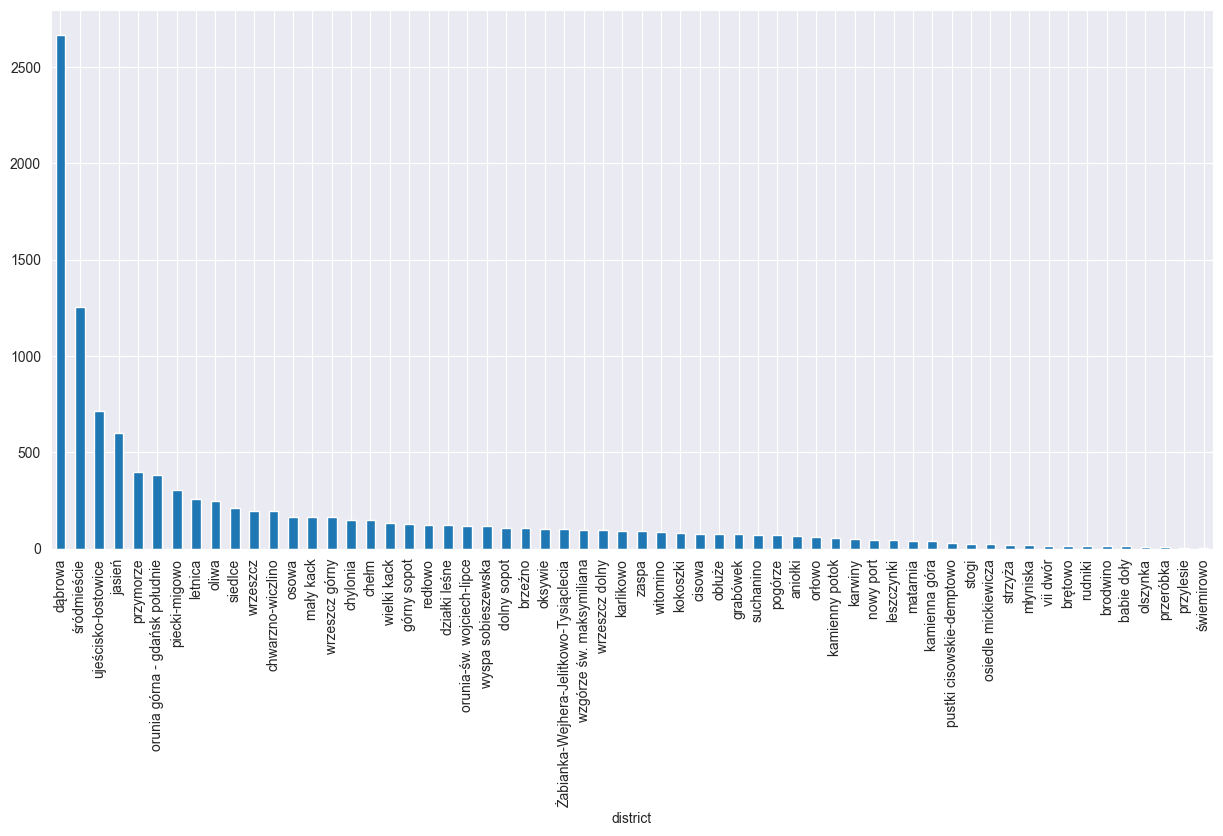

In [14]:
# plotting a bar chart of number of occurences of each district
data['district'].value_counts().plot(kind='bar', figsize=(15, 7))
plt.show()

In [15]:
# concatenating the city and district columns
data['city_district'] = data['city'] + '_' + data['district']
# saving the number of occurences of each district in the dataset to a dictionary
districts = data['city_district'].value_counts().to_dict()
# replacing the district names with the number of occurences
data['city_district'] = data['city_district'].map(districts)

In [16]:
drop_columns = ['city', 'district']
data = data.drop(drop_columns, axis=1)

In [17]:
#data = data.where(data['city'] == 'gdansk').dropna()

In [18]:
#data.head().dropna()

In [19]:
data.head()

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,latitude,longtitude,crimes_per_city,city_district
0,24.89,1.0,4-7,secondary,0,1,2022.0,1.0,Apartment,0.0,16749.98,0,0,0,śląska 12,54.406171,18.576846,71,400
1,25.72,1.0,0,secondary,0,1,2022.0,1.0,Apartment,0.0,18500.00,0,0,0,śląska 12,54.406171,18.576846,71,400
2,34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Apartment,0.0,15997.67,1,0,0,mariana kołodzieja,54.334542,18.585750,71,715
3,101.58,4.0,4-7,secondary,0,1,1997.0,1.0,Apartment,0.0,11468.79,0,0,0,janusza korczaka,54.494118,18.543134,144,124
4,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Apartment,1.0,10279.41,1,0,0,oliwkowa,54.471180,18.470508,144,2663


In [97]:
data_numerical = data.drop(['type_of_market', 'type_of_building', 'floor', 'street'], axis=1)

<Axes: >

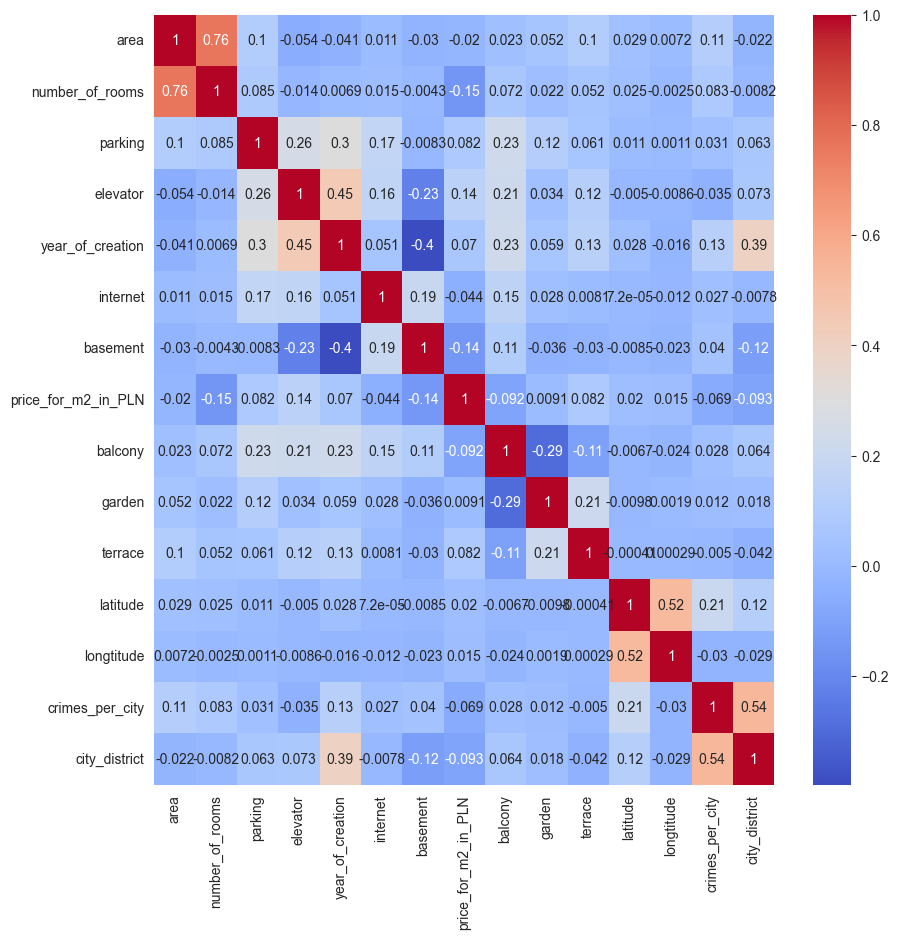

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data_numerical.corr(), annot=True, ax=ax, cmap='coolwarm')

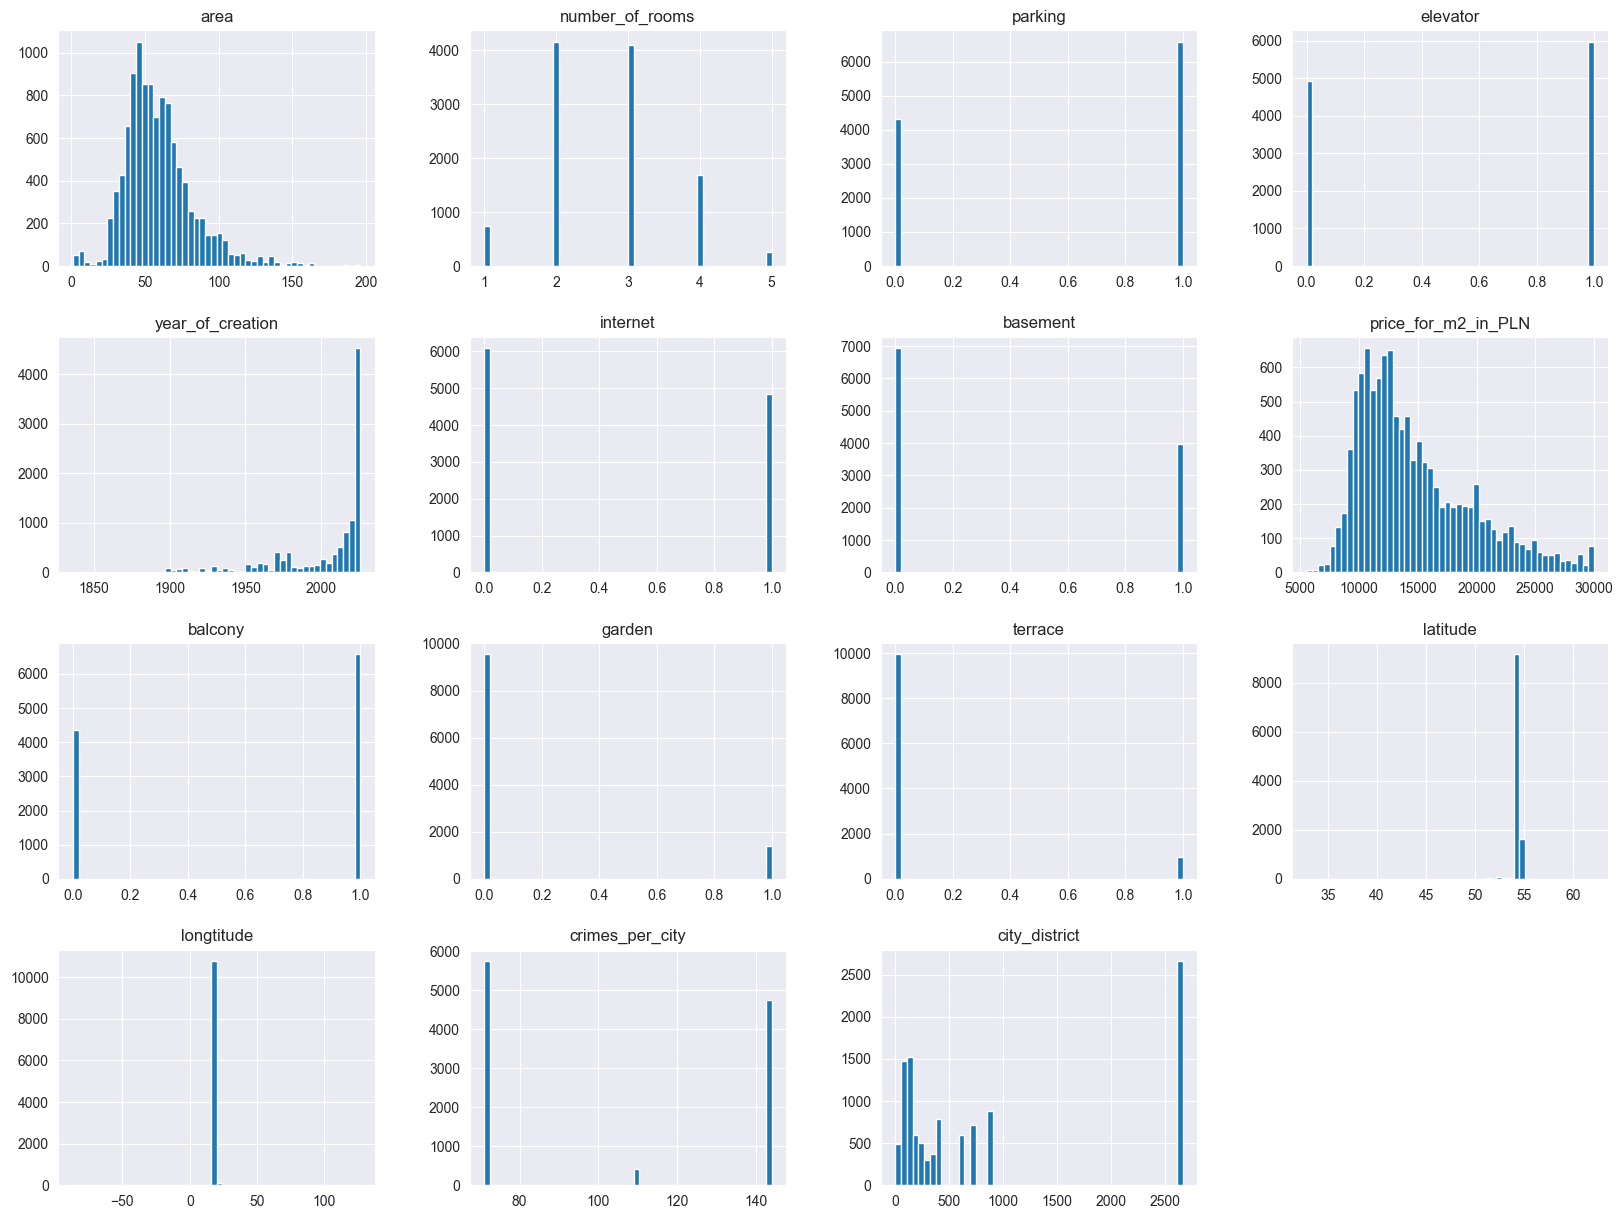

In [99]:
# histogram
data_numerical.hist(bins=50, figsize=(20,15))
plt.show()

In [100]:
from matplotlib import pylab
from scipy import stats


def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    

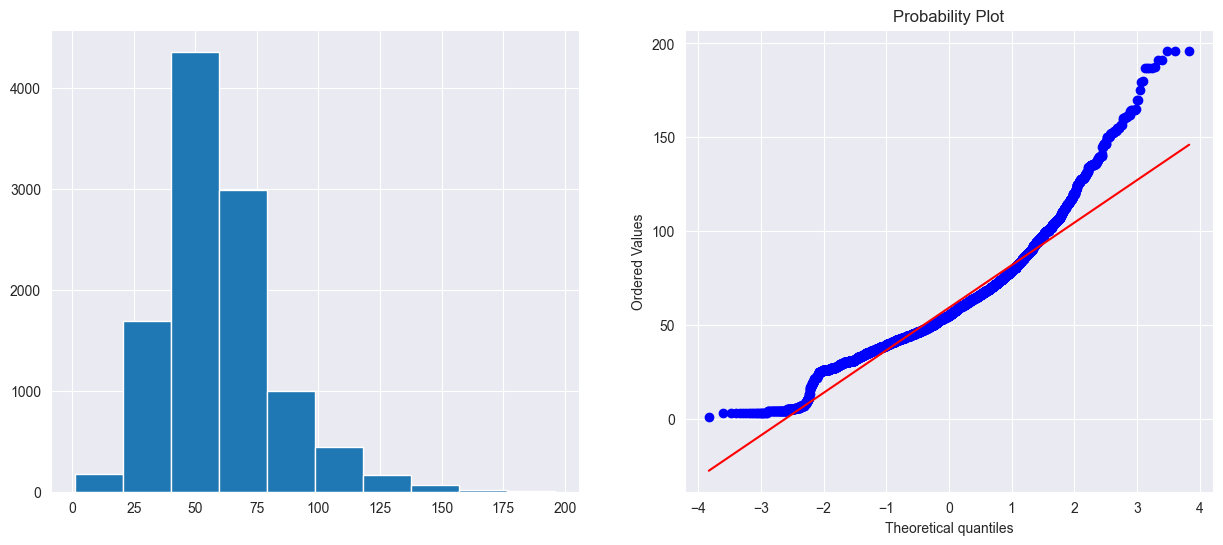

In [101]:
diagnostic_plots(data, 'area')

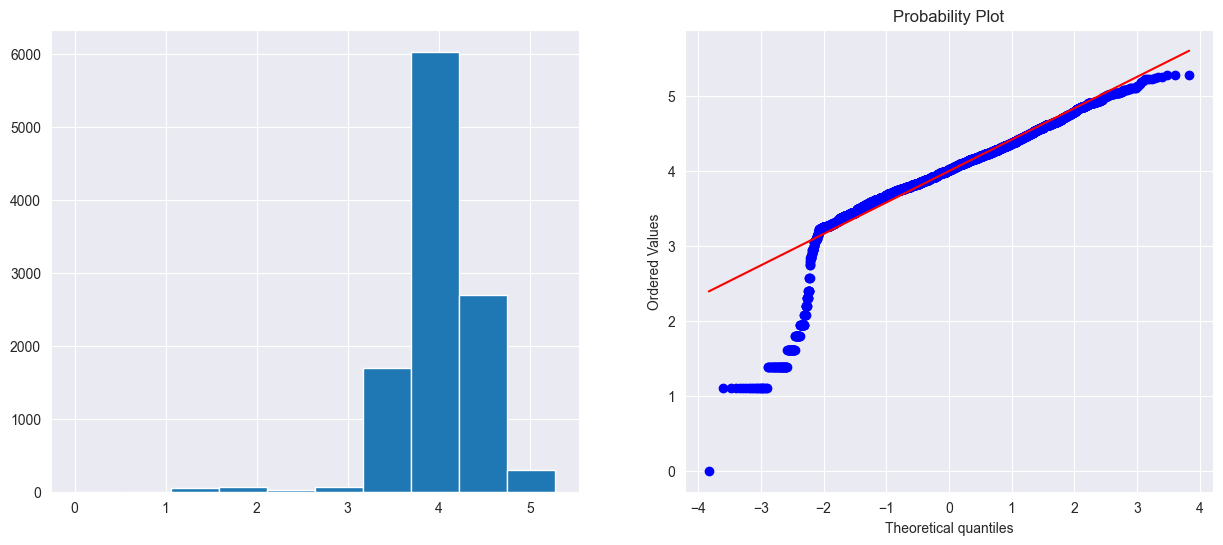

In [102]:
data_numerical['area'] = np.log(data['area'])
diagnostic_plots(data_numerical, 'area')

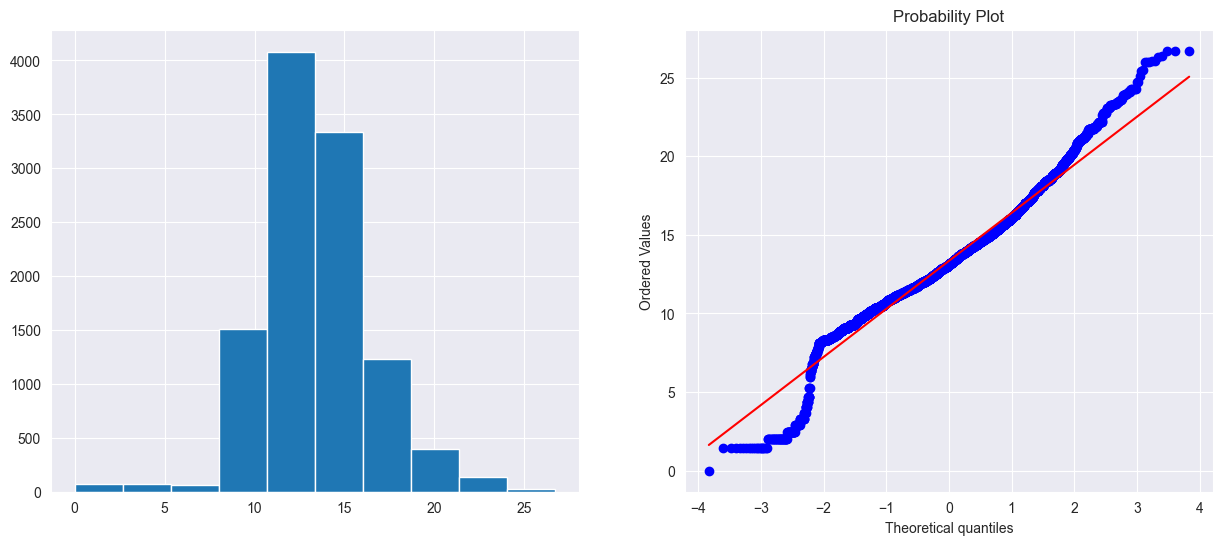

In [103]:
data_numerical['area'], param = stats.boxcox(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

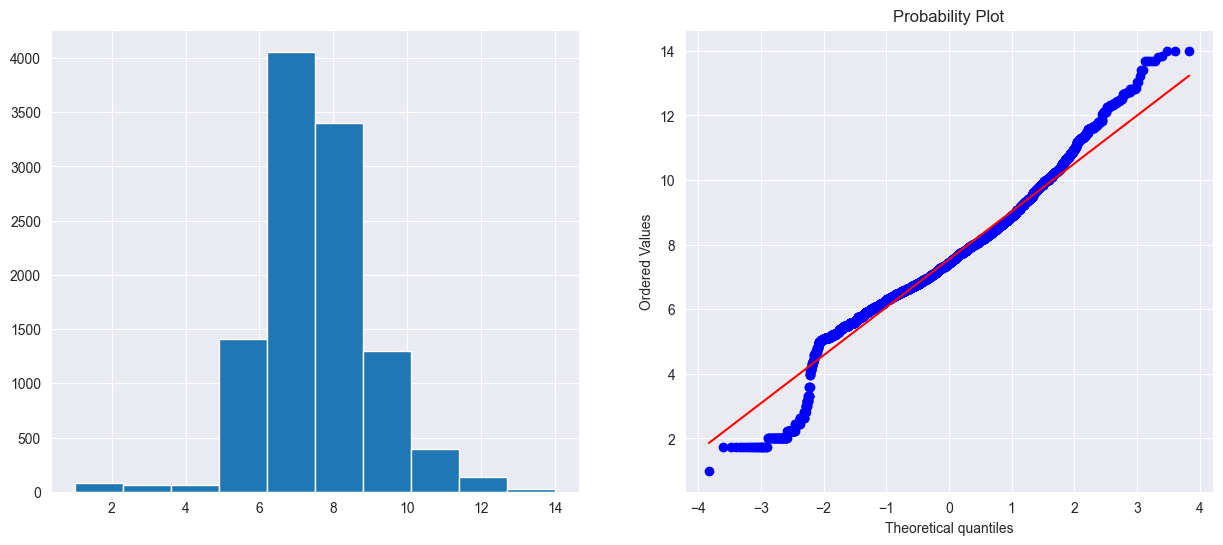

In [104]:
data_numerical['area'] = np.sqrt(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

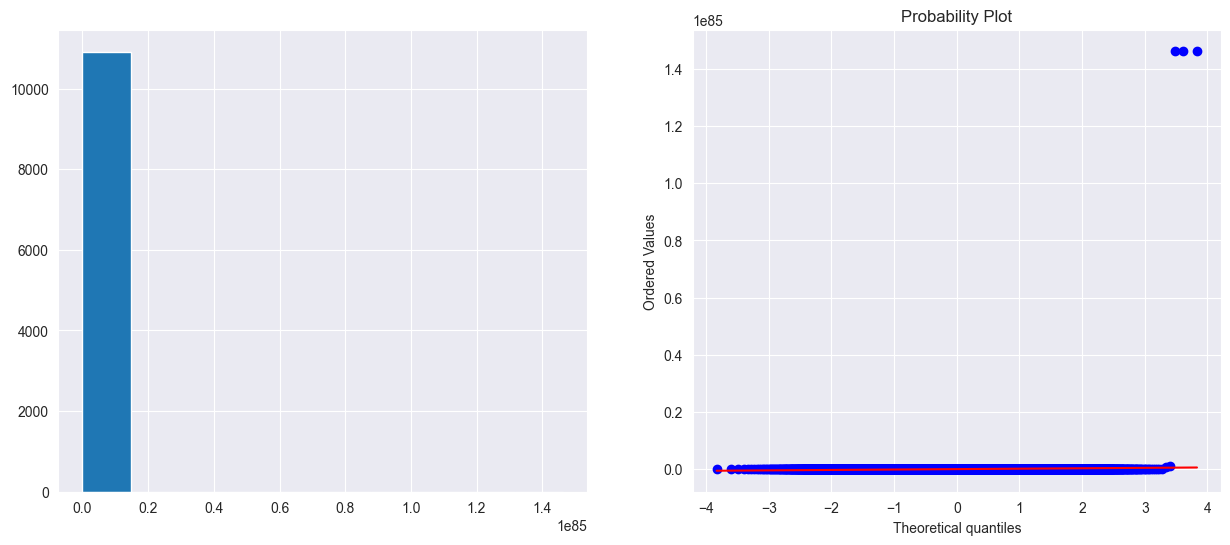

In [105]:
data_numerical['area'] = np.exp(data['area']) # you can vary the exponent as needed
diagnostic_plots(data_numerical, 'area')

In [106]:
A = data.drop(['price_for_m2_in_PLN', 'street'], axis=1)
b = data['price_for_m2_in_PLN']

In [107]:
#A = np.column_stack([np.ones(A.shape[0]), A])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [109]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8732, 17) (2184, 17) (8732,) (2184,)


In [110]:
A['floor'].dtype

dtype('O')

> DEBIL MOMENT

In [111]:
#encoder_one_hot = OneHotEncoder()
#X_train_one_hot = encoder_one_hot.fit_transform(X_train[['floor', 'type_of_market', 'type_of_building', 'district']])

In [112]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [113]:
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)

In [114]:
preprocessor = preprocessor.fit(X_train, y_train)

In [115]:
preprocessor.get_feature_names_out()

array(['cat__floor_0', 'cat__floor_1-3', 'cat__floor_4-7',
       'cat__floor_8+', 'cat__type_of_market_primary',
       'cat__type_of_market_secondary', 'cat__type_of_building_Apartment',
       'cat__type_of_building_House', 'remainder__area',
       'remainder__number_of_rooms', 'remainder__parking',
       'remainder__elevator', 'remainder__year_of_creation',
       'remainder__internet', 'remainder__basement', 'remainder__balcony',
       'remainder__garden', 'remainder__terrace', 'remainder__latitude',
       'remainder__longtitude', 'remainder__crimes_per_city',
       'remainder__city_district'], dtype=object)

In [116]:
X_train_preprocessed = preprocessor.transform(X_train)

In [117]:
model = LinearRegression()

In [118]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [119]:
X_test_preprocessed = preprocessor.transform(X_test)

In [120]:
y_pred = model.predict(X_test_preprocessed)

In [121]:
mse = mean_squared_error(y_test, y_pred)
print(f"One-Hot Encoding Model - Mean Squared Error: {mse}")

One-Hot Encoding Model - Mean Squared Error: 20989543.714142673


In [122]:
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  4581.434678585156


In [123]:
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

ValueError: Root Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [124]:
for i in range(20):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Predicted: 16678.5, Actual: 12104.36
Predicted: 15046.75, Actual: 25833.33
Predicted: 13526.0, Actual: 12459.0
Predicted: 14230.0, Actual: 9472.07
Predicted: 15365.75, Actual: 18448.0
Predicted: 14138.5, Actual: 9694.0
Predicted: 14956.25, Actual: 14900.0
Predicted: 11647.5, Actual: 10217.39
Predicted: 14326.25, Actual: 15535.05
Predicted: 13533.0, Actual: 9800.0
Predicted: 12753.75, Actual: 11750.0
Predicted: 16689.75, Actual: 18444.44
Predicted: 14462.25, Actual: 8600.0
Predicted: 12025.75, Actual: 11744.82
Predicted: 14995.5, Actual: 19353.14
Predicted: 12863.25, Actual: 19700.0
Predicted: 17325.25, Actual: 13383.3
Predicted: 11784.0, Actual: 14604.37
Predicted: 13976.0, Actual: 28905.0
Predicted: 13513.5, Actual: 10504.03


In [125]:
print(X_test_preprocessed.shape, y_test.shape, y_pred.shape)

(2184, 22) (2184,) (2184,)


In [126]:
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
d = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
d

{'cat__floor_0': np.float64(-2211402370639591.0),
 'cat__floor_1-3': np.float64(-2211402370639471.0),
 'cat__floor_4-7': np.float64(-2211402370639003.8),
 'cat__floor_8+': np.float64(-2211402370637031.0),
 'cat__type_of_market_primary': np.float64(21900560132944.33),
 'cat__type_of_market_secondary': np.float64(21900560134918.766),
 'cat__type_of_building_Apartment': np.float64(-17573407785835.61),
 'cat__type_of_building_House': np.float64(-17573407788579.46),
 'remainder__area': np.float64(966.126695318044),
 'remainder__number_of_rooms': np.float64(-1457.795293532029),
 'remainder__parking': np.float64(494.33774797379584),
 'remainder__elevator': np.float64(568.8443098888381),
 'remainder__year_of_creation': np.float64(369.7448279902449),
 'remainder__internet': np.float64(-186.57664738003498),
 'remainder__basement': np.float64(-523.1925587312669),
 'remainder__balcony': np.float64(-544.8717432611589),
 'remainder__garden': np.float64(-142.87816952839324),
 'remainder__terrace': np

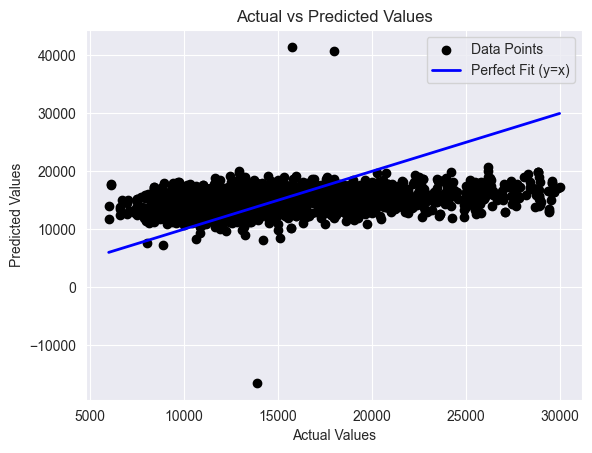

In [127]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [128]:
r2_lr = r2_score(y_test, y_pred)
r2_lr

0.09950344613050754

> Decision Trees

In [129]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor()

In [130]:
y_pred_DT = DT_model.predict(X_test_preprocessed)

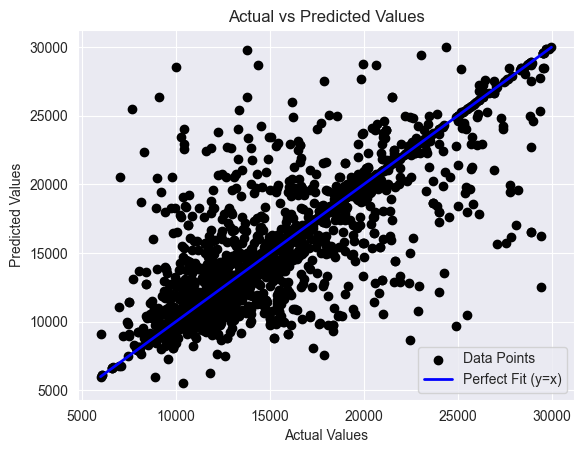

In [131]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_DT, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [132]:
rmse_DT = root_mean_squared_error(y_test, y_pred_DT)
print("RMSE: ", rmse_DT)

RMSE:  2908.7285462843515


In [133]:
r2_dt = r2_score(y_test, y_pred_DT)
r2_dt

0.6370177037514857

> Random forest

In [134]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(max_depth=20, min_samples_split=10)
RF_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [135]:
y_pred_RF = RF_model.predict(X_test_preprocessed)

In [136]:
from sklearn.model_selection import cross_val_score

#rf_scores = cross_val_score(RF_model, X_train_preprocessed, y_train, scoring='root_mean_squared_error')

In [137]:
#max(rf_scores)

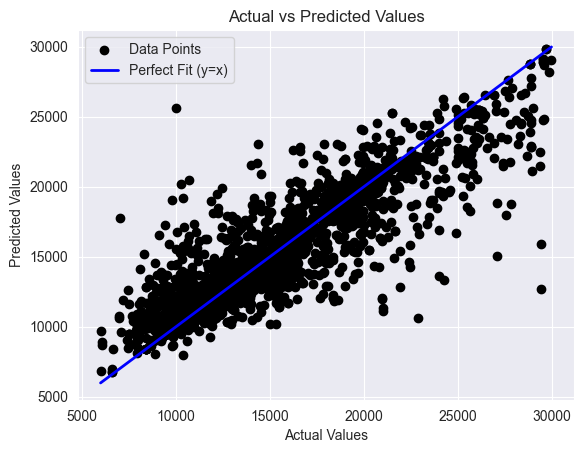

In [138]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [139]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
print("RMSE: ", rmse_RF)

RMSE:  2285.7299891603047


In [140]:
rmlse_RF = root_mean_squared_log_error(y_test, y_pred_RF)
rmlse_RF

np.float64(0.15026773641620272)

In [141]:
RF_model.score(X_test_preprocessed, y_test)

0.7758550750146753

In [142]:
r2_rf = r2_score(y_test, y_pred_RF)
r2_rf

0.7758550750146753

KNR

In [143]:
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor(n_neighbors=20)

knr_model.fit(X_train_preprocessed, y_train)

KNeighborsRegressor(n_neighbors=20)

In [144]:
y_pred_knr = knr_model.predict(X_test_preprocessed)

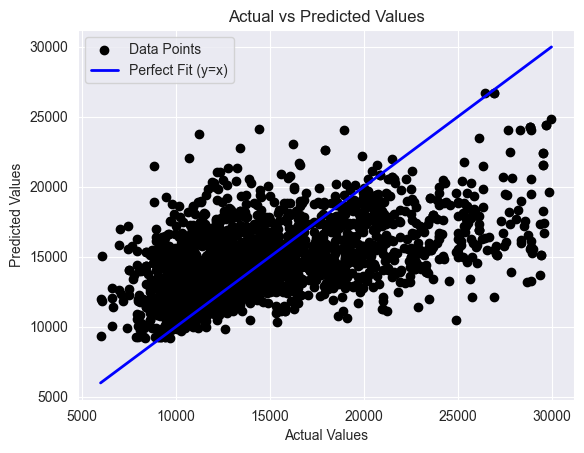

In [145]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_knr, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [146]:
rmse_knr = root_mean_squared_error(y_test, y_pred_knr)
rmse_knr

np.float64(4047.8315713855973)

#### R2 knr

In [147]:
r2_knr = r2_score(y_test, y_pred_knr)
r2_knr

0.29705082712656183

Gradient boosting

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor()
model_GB.fit(X_train_preprocessed, y_train)

GradientBoostingRegressor()

In [149]:
y_pred_GB = model_GB.predict(X_test_preprocessed)

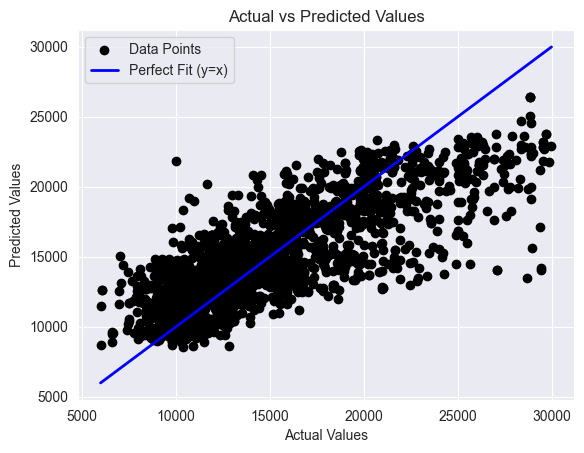

In [150]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [151]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

np.float64(2979.9664447222112)

In [152]:
#param_grid = {
#    'max_depth': [7, 10, 15],
#    'min_samples_split': [2, 5, 10],
#    'learning_rate': [0.1, 0.5, 1],
#    'criterion': ['friedman_mse', 'squared_error'],
#    
#}
#model_GB = GradientBoostingRegressor()

In [153]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(model_GB, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [154]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

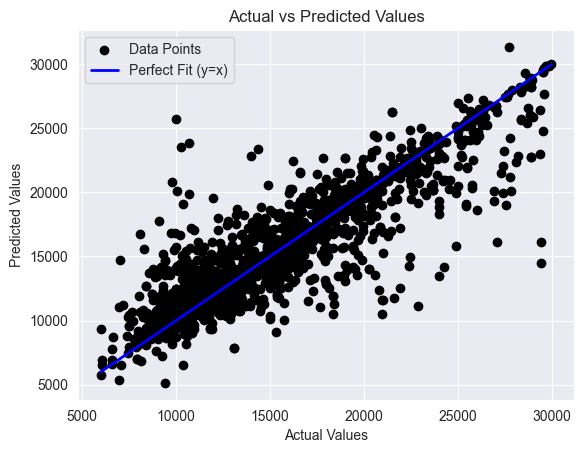

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, min_samples_split=5, n_estimators=1500, criterion='squared_error')
model_GB.fit(X_train_preprocessed, y_train)
y_pred_GB = model_GB.predict(X_test_preprocessed)
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [163]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

np.float64(2102.0776153726597)

In [164]:
rmsle_GB = root_mean_squared_log_error(y_test, y_pred_GB)
rmsle_GB

np.float64(0.13988619774117067)

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mae_GB

np.float64(1190.1288872095645)

In [166]:
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)
mape_GB

np.float64(0.08441938356325276)

#### R2 gb

In [167]:
r2_gb = r2_score(y_test, y_pred_GB)
r2_gb

0.8104269696013503

In [168]:
print("RMSE: ", round(rmse_GB,4))
print()
print("MAPE: ", round(mape_GB,4))
print()
print("MAE: ", round(mae_GB,4))
print()
print("R2: ", round(r2_gb,4))

RMSE:  2102.0776

MAPE:  0.0844

MAE:  1190.1289

R2:  0.8104


In [169]:
#Random forest parameters
#param_grid = {
#    'n_estimators': [200, 400, 600],
#   'max_depth': [5, 7, 10],
#    'min_samples_split': [2, 5, 10],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]
#}
#RF_model = RandomForestRegressor()

In [170]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(RF_model, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [171]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

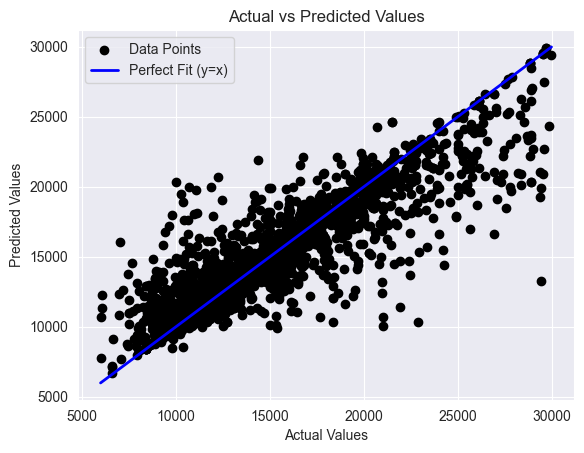

In [172]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(min_samples_split=2, n_estimators=800, max_features='sqrt', min_weight_fraction_leaf=0.0)
RF_model.fit(X_train_preprocessed, y_train)
y_pred_RF = RF_model.predict(X_test_preprocessed)
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [173]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
rmse_RF

np.float64(2265.0449398318365)

#### R2 random forest

In [174]:
r2_rf = r2_score(y_test, y_pred_RF)
r2_rf

0.7798935832720166

In [175]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mape_RF = mean_absolute_percentage_error(y_test, y_pred_RF)

In [177]:
print("RMSE: ", round(rmse_RF,4))
print()
print("MAPE: ", round(mape_RF,4))
print()
print("MAE: ", round(mae_RF,4))
print()
print("R2: ", round(r2_rf,4))

RMSE:  2265.0449

MAPE:  0.098

MAE:  1399.9956

R2:  0.7799


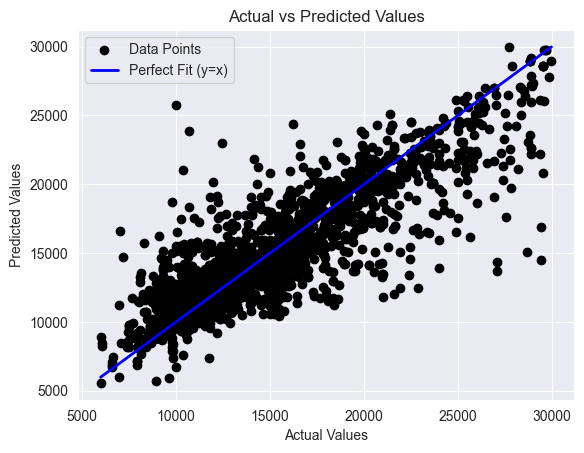

In [178]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor()
model_XGB.fit(X_train_preprocessed, y_train)
y_pred_XGB = model_XGB.predict(X_test_preprocessed)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_XGB, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [179]:
rmse_XGB = root_mean_squared_error(y_test, y_pred_XGB)
rmse_XGB

np.float64(2392.659259626155)

In [180]:
r2_xgb = r2_score(y_test, y_pred_XGB)
mape_XGB = mean_absolute_percentage_error(y_test, y_pred_XGB)
mae_XGB = mean_absolute_error(y_test, y_pred_XGB)

In [181]:
print("RMSE: ", rmse_XGB)
print()
print("MAPE: ", mape_XGB)
print()
print("MAE: ", mae_XGB)
print()
print("R2: ", r2_xgb)

RMSE:  2392.659259626155

MAPE:  0.1119321231925374

MAE:  1588.2855976705584

R2:  0.7543929848923303


In [182]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'eta': [0.01, 0.1, 0.3],
#    'subsample': [0.5, 0.7, 1],
#    'colsample_bytree': [0.5, 0.7, 1],
#    'objective': ['reg:squarederror', 'reg:squaredlogerror']
#}

#model_XGB = XGBRegressor()

In [183]:
#grid_search = GridSearchCV(model_XGB, param_grid, cv=3)
#grid_search.fit(X_train_preprocessed, y_train)

In [184]:
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

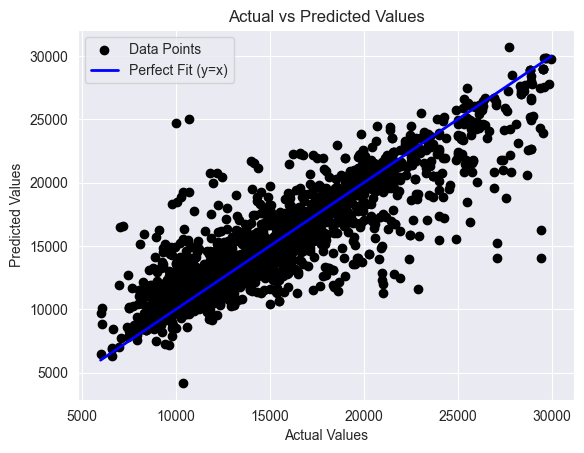

In [185]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(eta=0.1, max_depth=7, n_estimators=300, objective='reg:squarederror')
model_XGB.fit(X_train_preprocessed, y_train)
y_pred_XGB = model_XGB.predict(X_test_preprocessed)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_XGB, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [186]:
rmse_XGB = root_mean_squared_error(y_test, y_pred_XGB)
rmse_XGB

np.float64(2244.840779546348)

#### R2 xgboost

In [187]:
r2_xgb = r2_score(y_test, y_pred_XGB)
r2_xgb

0.783802760855272

In [188]:
mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mape_XGB = mean_absolute_percentage_error(y_test, y_pred_XGB)

In [191]:
print("RMSE: ", round(rmse_XGB,4))
print()
print("MAPE: ", round(mape_XGB,4))
print()
print("MAE: ", round(mae_XGB,4))
print()
print("R2: ", round(r2_xgb,4))

RMSE:  2244.8408

MAPE:  0.1019

MAE:  1429.9762

R2:  0.7838


In [190]:
# Creating ANN model
from keras.src.models import Sequential
from keras.src.layers import Dense

In [404]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_preprocessed.shape[1], activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\kubak\PycharmProjects\Real_estate_price_forecasting_2\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [405]:
from keras.src.callbacks import EarlyStopping
from keras.src.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.src import optimizers

optimizer = optimizers.Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=optimizer)
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.01)

In [408]:
X_train_preprocessed_np = X_train_preprocessed.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [409]:
# Train the model
model.fit(X_train_preprocessed, y_train, epochs=600, batch_size=256, validation_split=0.2, callbacks=[mcp_save, reduce_lr, earlyStopping])

Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 129267728.0000 - val_loss: 23679016.0000 - learning_rate: 0.0100
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 23390078.0000 - val_loss: 19630110.0000 - learning_rate: 0.0100
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 18382646.0000 - val_loss: 18972762.0000 - learning_rate: 0.0100
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 17472810.0000 - val_loss: 18018490.0000 - learning_rate: 0.0100
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 17131316.0000 - val_loss: 17927772.0000 - learning_rate: 0.0100
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 16809938.0000 - val_loss: 22178464.0000 - learning_rate: 0.0100
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 17474586.0000 - val_loss: 17159520.0000 - learning_rate: 0.0100
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 16041567.0000 - val_loss: 18139722.0000 - learning_rate: 0.0100
Epoch 9

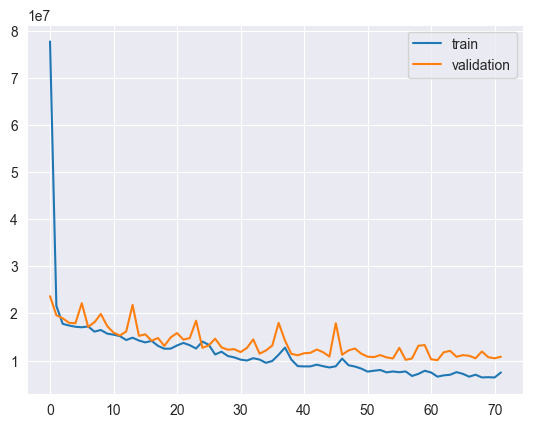

In [410]:
#Accuracy during training
plt.plot(model.history.history['loss'], label='train')
plt.plot(model.history.history['val_loss'], label='validation')
plt.legend()
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


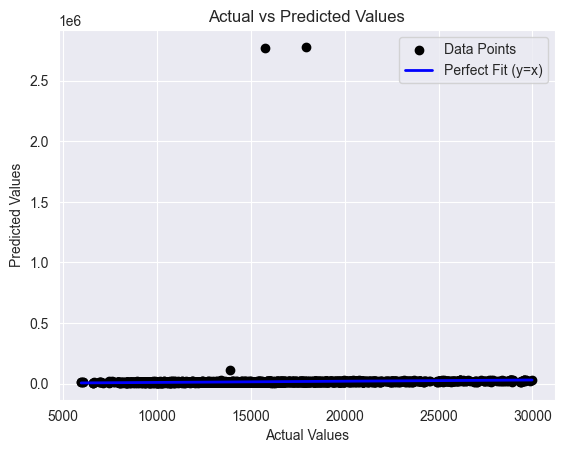

In [411]:
from keras.saving import load_model

# Predictions
model = load_model('best_model.keras')
y_pred_ANN = model.predict(X_test_preprocessed)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_ANN, color="black", label="Data Points")
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")
# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [412]:
rmse_ANN = root_mean_squared_error(y_test, y_pred_ANN)
rmse_ANN

np.float64(83550.86351399036)

In [413]:
from sklearn.metrics import mean_absolute_error
mae_ANN = mean_absolute_error(y_test, y_pred_ANN)
mae_ANN

np.float64(4802.817102310124)

In [414]:
r2_ann = r2_score(y_test, y_pred_ANN)
r2_ann

-298.48904640251897